
## Importing Data

In [ ]:
import numpy as np
import PIL 
from PIL import Image 
import matplotlib.pyplot as plt
from matplotlib import image
import cv2 as cv
from sklearn.metrics import mean_squared_error
from google.colab.patches import cv2_imshow

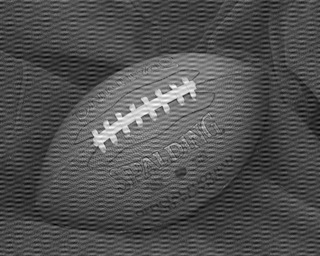

In [ ]:
# Importing the 8 bit image
img = cv.imread('/content/sample_data/noiseball.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_p = Image.open('/content/sample_data/noiseball.png')
cv2_imshow(img)

In [ ]:
# Checking shape
img

array([[125, 118, 107, ...,  80,  67,  59],
       [ 86,  83,  81, ...,  68,  62,  66],
       [ 38,  34,  41, ...,  71,  73,  80],
       ...,
       [111,  99,  90, ...,  73,  66,  57],
       [100,  94,  98, ...,  71,  68,  62],
       [ 57,  59,  53, ...,  63,  70,  71]], dtype=uint8)

In [ ]:
print(f"Min, Max {np.min(img), np.max(img)}")

Min, Max (0, 255)


## Quantization

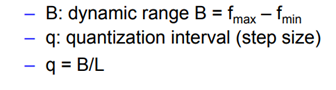

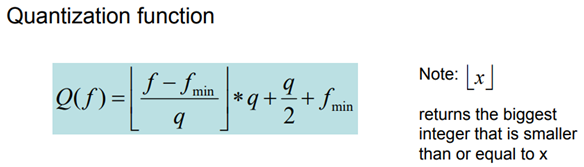

In [ ]:
def quantization(f, level, fmin, fmax):
    dr = fmax - fmin
    q = dr/level
    
    func = np.floor((f-fmin)/q)*q+q/2+fmin
    
    return func

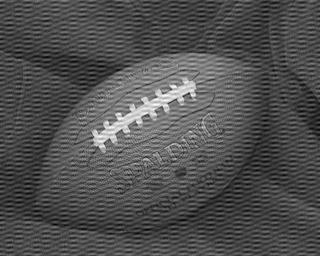

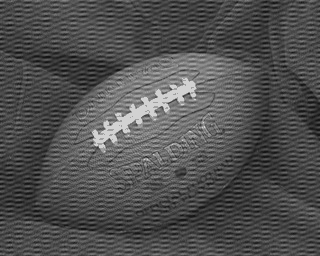




-----------Error----------




Error: 
 1.1327541599378308

Mean Square Error: 
 1.2831319868564606



---------------------





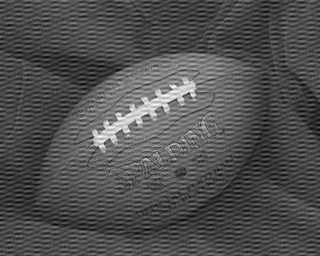

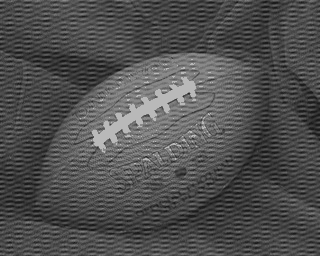




-----------Error----------




Error: 
 2.28193126591335

Mean Square Error: 
 5.207210302352905



---------------------





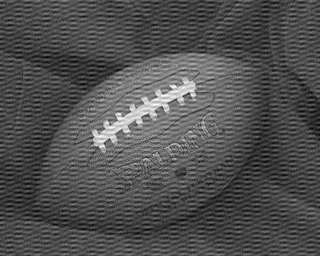

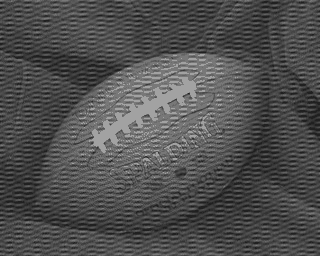




-----------Error----------




Error: 
 4.605636839512995

Mean Square Error: 
 21.211890697479248



---------------------





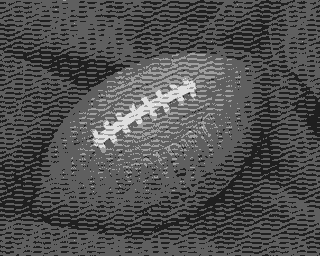

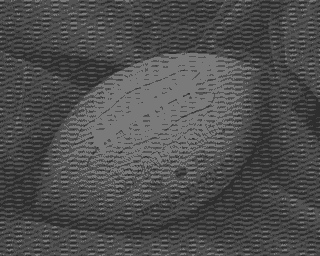




-----------Error----------




Error: 
 19.229168606389845

Mean Square Error: 
 369.76092529296875



---------------------





In [ ]:
'''Don't change the value, except level array'''
fmin = np.min(img)
fmax = np.max(img)
level = [64, 32, 16, 4]
error = []

for i in level:
    img_quant = quantization(img, i, fmin, fmax)
    cv2_imshow(img_quant)
    img_pil = img_p.quantize(i)
    display(img_pil)

    # Calculating the error
    print("\n\n\n-----------Error----------\n\n\n") 

    print("\nError: \n", mean_squared_error(img, np.array(img_quant), squared=False))
    print("\nMean Square Error: \n", mean_squared_error(img, np.array(img_quant)))
    
    print("\n\n\n---------------------\n\n\n") 

### Observations
1. As we can see that increasing the level size/input will make the image more clear.
2. On a very low value of the level input, there is a major loss of whites from the images, changing the intensity to nearly a grayish color.
3. As the size increases, the MSE decreases. Thus giving a more accurate image.

## Distance Measured

In [ ]:
# Converting to binary
img_1 = cv.imread("/content/sample_data/noiseball.png")
img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2GRAY)
img_binary = cv.threshold(img_1,127,255,cv.THRESH_BINARY)[1]

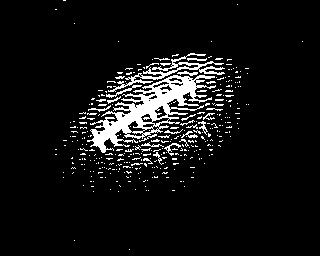

In [ ]:
cv2_imshow(img_binary)

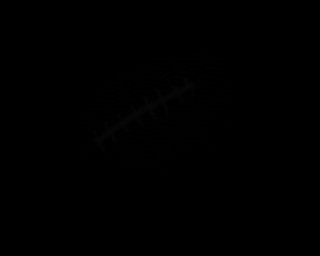

In [ ]:
# Distance Euclidian
dst_euc = cv.distanceTransform(img_binary, cv.DIST_L1, 3)
cv2_imshow(dst_euc)

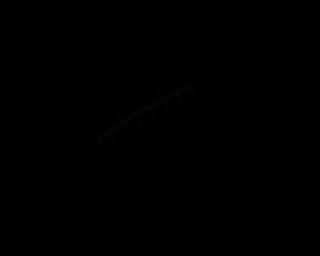

In [ ]:
# Distance City Block/D4
dst_cb = cv.distanceTransform(img_binary, cv.DIST_L2, 3)
cv2_imshow(dst_cb)

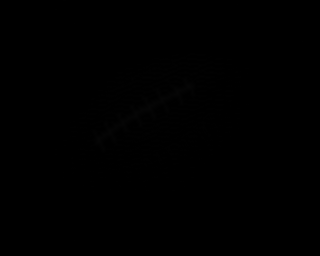

In [ ]:
# Distance Chessboard
dst_chess = cv.distanceTransform(img_binary ,cv.DIST_C, 3)
cv2_imshow(dst_chess)

## Spatial Operation
Automated Function

In [292]:
# NxN Filter
def spatial_filter(filter_size, img):
  # Obtain number of rows and columns  
  # of the image 
  m, n = img.shape 
    
  # Develop Averaging filter(3, 3) mask 
  mask = np.ones([filter_size, filter_size], dtype = int) 
  mask = mask / filter_size**2
    
  # Convolve the 3X3 mask over the image  
  img_new = np.zeros([m, n]) 
  ls = []

  sub_fact = int(np.floor(filter_size/2))

  for i in range(1, m-sub_fact): 
      for j in range(1, n-sub_fact): 
          x = i-sub_fact
          temp = 0

          # Masking 
          for k in range(filter_size):
            y = j-sub_fact
            for l in range(filter_size):
              temp += img[x, y]*mask[k, l]
              y+=1           
            x+=1
          ls.append(temp)
          img_new[i, j] = temp

  return img_new


Original Image



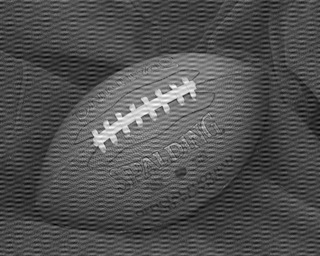



---------------------------------Filter Size : 3X3---------------------------------




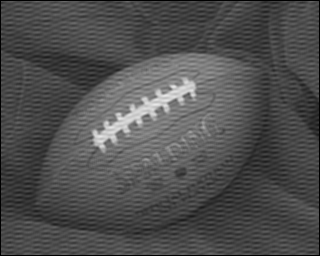



---------------------------------Filter Size : 5X5---------------------------------




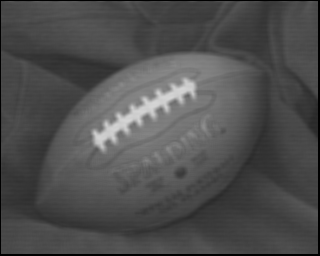



---------------------------------Filter Size : 7X7---------------------------------




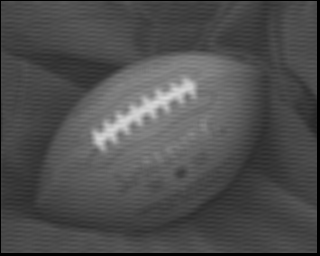

In [295]:
# Read the image 
img_s = cv.imread('/content/sample_data/noiseball.png', 0) 
filter_size = [3, 5, 7]

print(f"\nOriginal Image\n")
cv2_imshow(img_s)

for i in filter_size:
  img_filter = spatial_filter_3(i, img_s)
  print(f"\n\n---------------------------------Filter Size : {i}X{i}---------------------------------\n\n")
  cv2_imshow(img_filter)

### Conclusion
1. As the filter size increases the image becomes more blurred.
2. This is a soft blur kinda effect